In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
from sklearn import model_selection as ms
from sklearn import linear_model as lm
from yellowbrick.regressor import ResidualsPlot

In [2]:
df = pd.read_csv('../data/merged_data.csv')
df.columns = [x.lower() for x in df.columns]
df.drop(set(df[df["hivdiagnoses"] == 0].index), axis=0, inplace=True)
X = df[['hivdiagnoses', 'hivprevalence', 'plhiv', 'population']]
y = np.log(df['hivincidence'])

In [3]:
X_train, X_test, y_train, y_test = ms.train_test_split(
        X, y, test_size =.25,random_state=12345)

In [4]:
model = lm.Lasso(alpha = .01,fit_intercept=True,tol=10)
model.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=10, warm_start=False)

In [5]:
pred = model.predict(X_train)
r = sp.stats.linregress(pred,y_train)

In [6]:
cvs = ms.cross_val_score(model,X_train,y_train,cv=10)
print(cvs)

[0.48505061 0.5131059  0.37635216 0.40883026 0.44654012 0.4621827
 0.42658499 0.51970467 0.31073614 0.37212128]


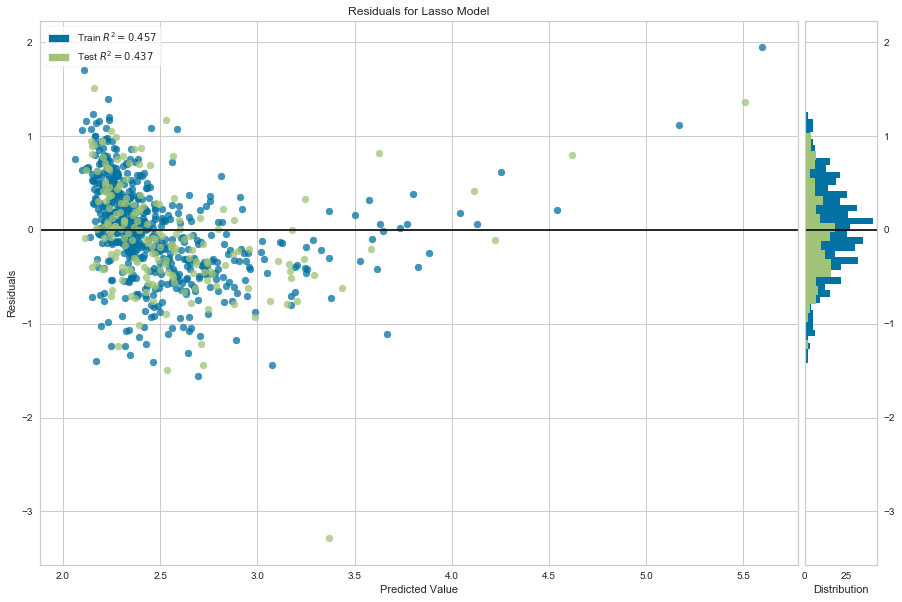

LinregressResult(slope=1.2956854173200787, intercept=-0.7352838574886214, rvalue=0.6944206555217752, pvalue=8.560451669822034e-82, stderr=0.05683717147400211)


In [7]:
visualizer = ResidualsPlot(model,size=(1080, 720))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()
print(r)

In [8]:
run nick_python.py

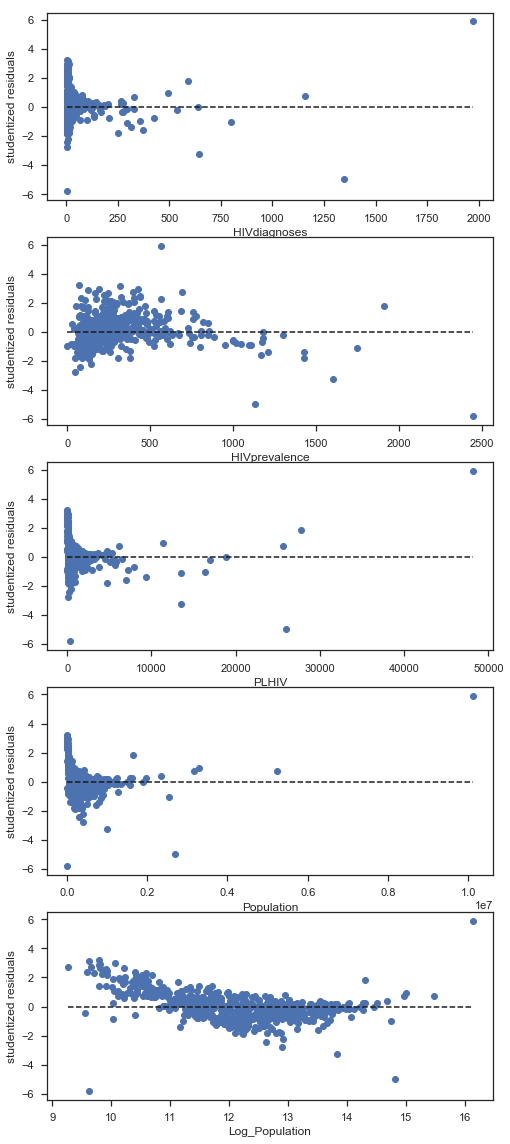

In [9]:
plot_residuals(X_train_full, X_holdout, y_train_full, y_holdout)

0.772782847135251


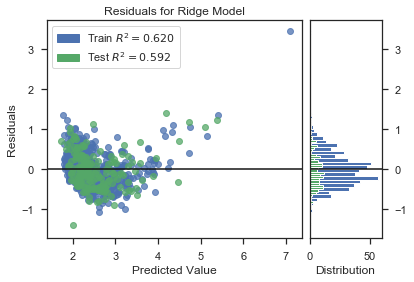

Training scores: [0.67640541 0.60636431 0.60154465 0.63252291 0.602413   0.60759592
 0.57976537 0.61474101 0.62158276 0.6017408 ] 

Testing scores: [-2.71169132  0.53724252  0.5865858   0.21607282  0.64599504  0.59083489
  0.72688696  0.50455115  0.37989039  0.65114672]


In [10]:
visualize_pred_residuals(X_train_full, X_holdout, y_train_full, y_holdout)

In [11]:
X_train_full = sm.add_constant(X_train_full)
model = sm.OLS(y_train_full, X_train_full)
results = model.fit()
results.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     180.3
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          1.28e-113
Time:                        14:32:41   Log-Likelihood:                -338.36
No. Observations:                 559   AIC:                             688.7
Df Residuals:                     553   BIC:                             714.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.0987      0.263     19.364      0.000       4.581       5.616
HIVdiagnoses       0.0051      0.001      8.513      0.000       0.004       0.006
HIVprevalence      0.0019    9.4e-05     20.208      0.000       0.002       0.002
PLHIV             -0.0002   2.39e-05     -8.372      0.000      -0.000      -0.000
Population      1.878e-07   8.64e-08      2.173      0.030     1.8e-08    3.58e-07
Log_Population    -0.2709      0.023    -12.038      0.000      -0.315      -0.227
==============================================================================
Omnibus:                      161.592   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.751
Skew:                          -1.140   Prob(JB):                    2.34e-204
Kurtosis:                       8.922   Cond. No.                     9.69e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X_men_pop = X.copy()
X_men_pop["ADULTMEN"] = np.log(hiv_data["ADULTMEN"])
X_train_men, X_holdout_men, y_train_men, y_holdout_men = train_test_split(X_men_pop, y)

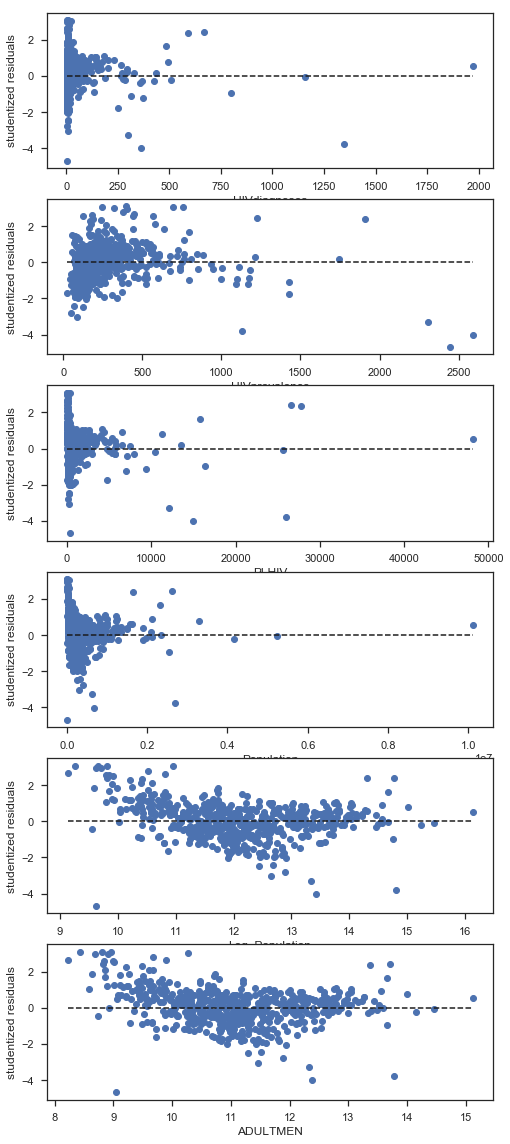

In [13]:
plot_residuals(X_train_men, X_holdout_men, y_train_men, y_holdout_men)

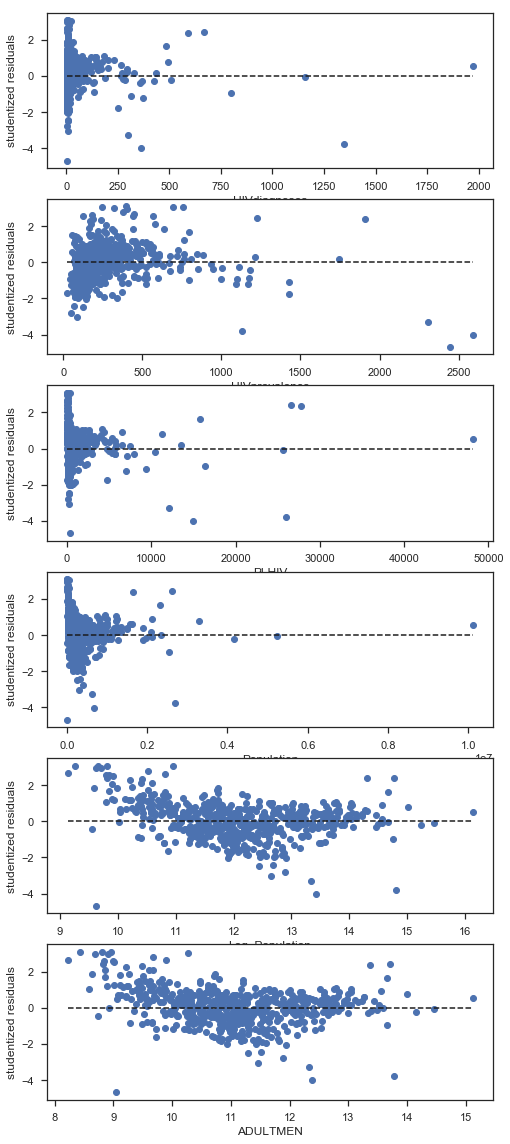

In [14]:
plot_residuals(X_train_men, X_holdout_men, y_train_men, y_holdout_men)

In [15]:
X_train_men = sm.add_constant(X_train_men)
model = sm.OLS(y_train_men, X_train_men)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     145.4
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          3.37e-110
Time:                        14:32:42   Log-Likelihood:                -329.38
No. Observations:                 559   AIC:                             672.8
Df Residuals:                     552   BIC:                             703.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.9609      0.329     12.031      0.000       3.314       4.608
HIVdiagnoses       0.0045      0.001      8.163      0.000       0.003       0.006
HIVprevalence      0.0019   9.11e-05     20.694      0.000       0.002       0.002
PLHIV             -0.0002   2.02e-05     -9.066      0.000      -0.000      -0.000
Population      2.762e-07   8.48e-08      3.257      0.001     1.1e-07    4.43e-07
Log_Population     1.3110      0.271      4.836      0.000       0.778       1.844
ADULTMEN          -1.6249      0.278     -5.848      0.000      -2.171      -1.079
==============================================================================
Omnibus:                       82.318   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.378
Skew:                          -0.741   Prob(JB):                     6.27e-48
Kurtosis:                       5.672   Cond. No.                     1.83e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X_poverty = X.copy()
X_poverty["poverty_rate"] = np.log(hiv_data["poverty_rate"])
X_poverty.drop("Log_Population", axis=1, inplace=True)
X_train_poverty, X_holdout_poverty, y_train_poverty, y_holdout_poverty = train_test_split(X_poverty, y)

0.7937640788760736


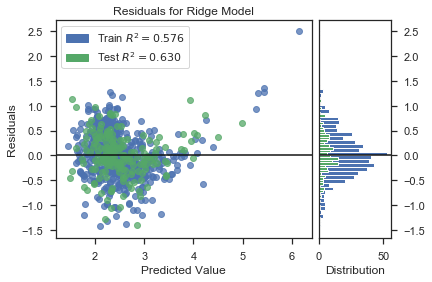

Training scores: [0.66626209 0.63249206 0.65831683 0.63392628 0.63489903 0.66574115
 0.64255104 0.63455861 0.65741827 0.63354413] 

Testing scores: [0.09487412 0.76051593 0.25985979 0.76234264 0.6509919  0.36062927
 0.62932797 0.75109544 0.47524186 0.61977571]


In [17]:
visualize_pred_residuals(X_train_poverty, X_holdout_poverty, y_train_poverty, y_holdout_poverty)

In [40]:
X_train_poverty = sm.add_constant(X_train_poverty)
model = sm.OLS(y_train_poverty, X_train_poverty)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     150.4
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          1.23e-100
Time:                        14:33:37   Log-Likelihood:                -369.83
No. Observations:                 559   AIC:                             751.7
Df Residuals:                     553   BIC:                             777.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6959      0.149      4.685      0.000       0.404       0.988
HIVdiagnoses      0.0047      0.001      8.649      0.000       0.004       0.006
HIVprevalence     0.0017      0.000     16.429      0.000       0.001       0.002
PLHIV            -0.0002   1.95e-05     -8.821      0.000      -0.000      -0.000
Population    -1.763e-07   8.08e-08     -2.182      0.030   -3.35e-07   -1.76e-08
poverty_rate      0.4853      0.054      9.069      0.000       0.380       0.590
==============================================================================
Omnibus:                       27.261   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.104
Skew:                          -0.249   Prob(JB):                     8.88e-14
Kurtosis:                       4.527   Cond. No.                     4.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
import statsmodels.api as sm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp
import numpy as np
%matplotlib inline
from statsmodels.stats.diagnostic import HetGoldfeldQuandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn as sk
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection as ms
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression

In [20]:
def read_data():
    df = pd.read_csv("../data/merged_data.csv")
    df.fillna(0, inplace = True)
    df.drop(set(df[df["HIVdiagnoses"] == 0].index), axis=0, inplace=True)
    cols = ["HIVdiagnoses", "HIVprevalence", "PLHIV", "Population"]
    X = pd.DataFrame(index=df["ADULTMEN"].index, columns=cols)
    for col in cols:
        X[col] = df[col]
    y = np.array(df["HIVincidence"])
    return df, X, y

In [21]:
def read_data_new():
    df = pd.read_csv("../data/merged_data.csv")
    df.fillna(0, inplace = True)
    df.drop(set(df[df["HIVdiagnoses"] == 0].index), axis=0, inplace=True)
    cols = ['HIVdiagnoses', 'HIVprevalence', 'MSM12MTH', 'MSM5YEAR']
    X = pd.DataFrame(index=df["ADULTMEN"].index, columns=cols)
    for col in cols:
        X[col] = df[col]
    y = np.array(df["HIVincidence"])
    return df, X, y

In [22]:
hiv_data, X, y = read_data()
hiv_data, Z, y = read_data_new()

In [23]:
model = sm.OLS(y, Z)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     92.44
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           8.52e-64
Time:                        14:32:43   Log-Likelihood:                -3564.4
No. Observations:                 747   AIC:                             7137.
Df Residuals:                     743   BIC:                             7155.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
HIVdiagnoses      0.0504      0.018      2.732      0.006       0.014       0.087
HIVprevalence     0.0465      0.003     15.661      0.000       0.041       0.052
MSM12MTH          4.1338      2.988      1.384      0.167      -1.731       9.999
MSM5YEAR         -2.6746      1.933     -1.384      0.167      -6.469       1.119
==============================================================================
Omnibus:                     1791.275   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9830495.800
Skew:                          22.059   Prob(JB):                         0.00
Kurtosis:                     563.261   Cond. No.                     6.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
y_logged = np.log(y)
model = sm.OLS(y_logged, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     800.0
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          1.62e-267
Time:                        14:32:43   Log-Likelihood:                -1155.8
No. Observations:                 747   AIC:                             2320.
Df Residuals:                     743   BIC:                             2338.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
HIVdiagnoses      0.0032      0.001      2.766      0.006       0.001       0.006
HIVprevalence     0.0058      0.000     47.409      0.000       0.006       0.006
PLHIV            -0.0006   4.01e-05    -14.324      0.000      -0.001      -0.000
Population     2.118e-06   1.33e-07     15.883      0.000    1.86e-06    2.38e-06
==============================================================================
Omnibus:                      493.502   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13985.797
Skew:                          -2.514   Prob(JB):                         0.00
Kurtosis:                      23.593   Cond. No.                     1.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
params = results.params
params

HIVdiagnoses     0.003220
HIVprevalence    0.005788
PLHIV           -0.000575
Population       0.000002
dtype: float64

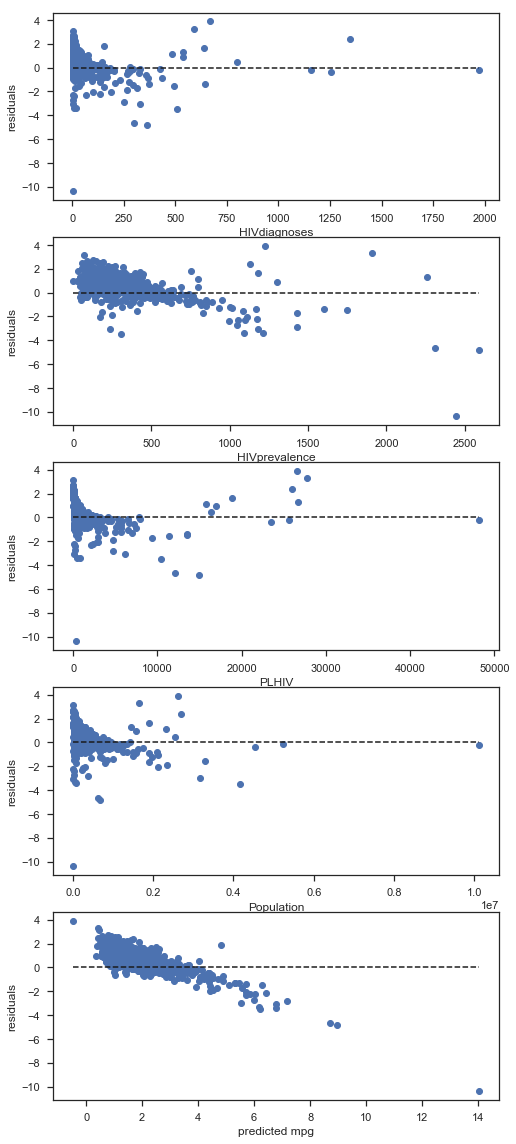

In [26]:
fig, axs = plt.subplots(5,1, figsize=(8,20))

axs[0].scatter(X['HIVdiagnoses'], results.resid)
axs[0].hlines(0,
              X['HIVdiagnoses'].min(), 
              X['HIVdiagnoses'].max(), 
              'k', linestyle='dashed')
axs[0].set_xlabel('HIVdiagnoses')
axs[0].set_ylabel('residuals');

axs[1].scatter(X['HIVprevalence'], results.resid)
axs[1].hlines(0,
              X['HIVprevalence'].min(), 
              X['HIVprevalence'].max(), 
              'k', linestyle='dashed')
axs[1].set_xlabel('HIVprevalence')
axs[1].set_ylabel('residuals');

axs[2].scatter(X['PLHIV'], results.resid)
axs[2].hlines(0,
              X['PLHIV'].min(), 
              X['PLHIV'].max(), 
              'k', linestyle='dashed')
axs[2].set_xlabel('PLHIV')
axs[2].set_ylabel('residuals');

axs[3].scatter(X['Population'], results.resid)
axs[3].hlines(0,
              X['Population'].min(), 
              X['Population'].max(), 
              'k', linestyle='dashed')
axs[3].set_xlabel('Population')
axs[3].set_ylabel('residuals');


axs[4].scatter(results.fittedvalues, results.resid)
axs[4].hlines(0,
              results.fittedvalues.min(), 
              results.fittedvalues.max(),
              'k', linestyle='dashed')
axs[4].set_xlabel('predicted mpg')
axs[4].set_ylabel('residuals');

In [27]:
f_statistic, p_value, _ = sm.stats.diagnostic.het_goldfeldquandt(y_logged, X, idx=1, alternative='two-sided')
print(p_value)

6.563169455896138e-55


In [28]:
stud_resids = results.outlier_test()['student_resid']

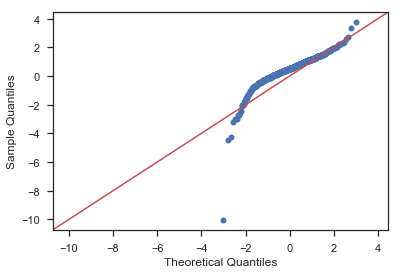

In [29]:
ax = sm.graphics.qqplot(stud_resids, line='45')

In [30]:
X_train, X_test, y_train, y_test = ms.train_test_split(X.values, y_logged, test_size =.25)
model = sm.OLS(y_train, X_train)
res = model.fit()
y_pred = res.predict(X_test)

In [31]:
X_train.shape

(560, 4)

In [32]:
X_test.shape

(187, 4)

In [33]:
r = sp.stats.linregress(y_pred,y_test)
r[2]

0.4742268630461035

In [34]:
reg = LinearRegression(fit_intercept=True).fit(X, y_logged)

In [35]:
cvr = ms.cross_validate(reg,X,y,cv=20,return_train_score=True)

In [36]:
print(cvr)

{'fit_time': array([0.0025878 , 0.00149703, 0.00173187, 0.00140381, 0.00127625,
       0.00117183, 0.00127697, 0.00152707, 0.00110507, 0.00102711,
       0.00101995, 0.00101995, 0.00121307, 0.00110078, 0.00127721,
       0.00116587, 0.00150394, 0.00131702, 0.00122714, 0.00108695]), 'score_time': array([0.00099897, 0.00087094, 0.00097203, 0.00086403, 0.00065589,
       0.00065923, 0.00092006, 0.00075984, 0.00059414, 0.00059485,
       0.000597  , 0.00059795, 0.00067592, 0.000633  , 0.00079989,
       0.00073814, 0.00085592, 0.00069189, 0.00067878, 0.00081086]), 'test_score': array([  0.53469374,  -1.88324401,   0.78079022,  -2.91521016,
        -0.03593605,   0.83836347,   0.07801777,   0.65245304,
         0.71191586,   0.67121828,   0.64654559, -13.93963266,
         0.51588385,   0.67655855,   0.80224397,   0.73629144,
         0.35830783,  -0.31796764,   0.38828206,   0.67563274]), 'train_score': array([0.20136776, 0.2080175 , 0.2006621 , 0.21944194, 0.20221557,
       0.20167535, 0

In [37]:
from yellowbrick.regressor import ResidualsPlot

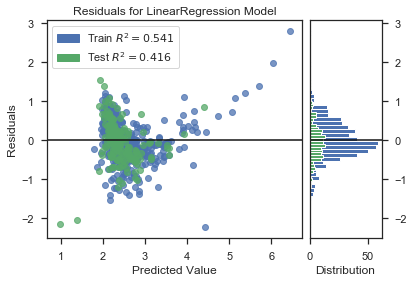

In [38]:
visualizer = ResidualsPlot(reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof() 